# **How To Create Stunning Embedding Visualizations Using UMAP**


In the evolving field of artificial intelligence, understanding the data that drives AI is crucial, and embeddings are a fundamental component in AI, providing a way to represent complex data in a simplified form. They transform data such as words, images, and documents into dense vectors of numbers. These vectors capture the essence and relationships within the data, making it easier for AI models to process and understand. Still, their high-dimensional nature makes them difficult to comprehend directly.

Visualizing embeddings can offer valuable insights into how models interpret and process information, transforming high-dimensional data into a more interpretable form. Transformers, a type of neural network architecture known for its efficiency and accuracy, can generate embeddings that reveal patterns and relationships that might not be immediately apparent. In this blog, we will explore UMAP, a dimensionality reduction technique used to visualize embeddings. It transforms high-dimensional data into a low-dimensional space making it ideal for revealing clusters and patterns in complex datasets.

In [5]:
# ! pip install transformers sentence-transformers datasets umap-learn

# Imorting the libraries, loading the data and data processing

In [6]:
from sklearn.datasets import fetch_20newsgroups
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from tqdm import tqdm


newsgroups_train = fetch_20newsgroups(subset='train')

# Apply functions to remove names, emails, and extraneous words from data points in newsgroups.data
newsgroups_train.data = [re.sub(r'[\w\.-]+@[\w\.-]+', '', d) for d in newsgroups_train.data] # Remove email
newsgroups_train.data = [re.sub(r"\([^()]*\)", "", d) for d in newsgroups_train.data] # Remove names
newsgroups_train.data = [d.replace("From: ", "") for d in newsgroups_train.data] # Remove "From: "
newsgroups_train.data = [d.replace("\nSubject: ", "") for d in newsgroups_train.data] # Remove "\nSubject: "

In [7]:
# Put training points into a dataframe
df_train = pd.DataFrame(newsgroups_train.data, columns=['Text'])
df_train['Label'] = newsgroups_train.target
# Match label to target name index
df_train['Class Name'] = df_train['Label'].map(newsgroups_train.target_names.__getitem__)
# Retain text samples that can be used in the gecko model.
df_train = df_train[df_train['Text'].str.len() < 10000]

df_train

,Text,Label,Class Name
0,WHAT car is this!?\nNntp-Posting-Host: rac3.w...,7,rec.autos
1,SI Clock Poll - Final Call\nSummary: Final ca...,4,comp.sys.mac.hardware
2,PB questions...\nOrganization: Purdue Univers...,4,comp.sys.mac.hardware
3,Re: Weitek P9000 ?\nOrganization: Harris Comp...,1,comp.graphics
4,Re: Shuttle Launch Question\nOrganization: Sm...,14,sci.space
...,...,...,...
11309,Re: Migraines and scans\nDistribution: world...,13,sci.med
11310,Screen Death: Mac Plus/512\nLines: 22\nOrganiz...,4,comp.sys.mac.hardware
11311,Mounting CPU Cooler in vertical case\nOrganiz...,3,comp.sys.ibm.pc.hardware
11312,Re: Sphere from 4 points?\nOrganization: Cent...,1,comp.graphics


# Filter for subset - Science

In [8]:
# Take a sample of each label category from df_train
SAMPLE_SIZE = 300
df_train = (df_train.groupby('Label', as_index = False)
                    .apply(lambda x: x.sample(SAMPLE_SIZE))
                    .reset_index(drop=True))

# Choose categories about science
df_train = df_train[df_train['Class Name'].str.contains('sci')]

# Reset the index
df_train = df_train.reset_index()
df_train

,index,Text,Label,Class Name
0,3300,"Re: Once tapped, your code is no good any more...",11,sci.crypt
1,3301,Clipper proposal - key length?\nOrganization:...,11,sci.crypt
2,3302,Re: The Old Key Registration Idea...\nOrganiz...,11,sci.crypt
3,3303,Re: Secret algorithm [Re: Clipper Chip and cr...,11,sci.crypt
4,3304,"Subject: Re: Once tapped, your code is no good...",11,sci.crypt
...,...,...,...,...
1195,4495,Re: Level 5?\nOrganization: U of Toronto Zool...,14,sci.space
1196,4496,Re: DC-X update???\nNntp-Posting-Host: starma...,14,sci.space
1197,4497,"Re: Level 5?\nIn-Reply-To: 's message of Tue,...",14,sci.space
1198,4498,Lunar Colony Race! By 2005 or 2010?\nArticle-I...,14,sci.space


In [9]:
def embedding_generator(df_path, model):
  tqdm.pandas()
  model = SentenceTransformer(model)
  df['Embeddings'] = df['Text'].progress_apply(lambda x: model.encode(x))
  return df

In [10]:
def inputgen(df):
  a = []
  for i in tqdm(range(len(df))):
    a.append(np.array(df["Embeddings"][i]))
  a = np.array(a)
  print(a.shape)
  return a

In [11]:
df = df_train[0:2000]
df

,index,Text,Label,Class Name
0,3300,"Re: Once tapped, your code is no good any more...",11,sci.crypt
1,3301,Clipper proposal - key length?\nOrganization:...,11,sci.crypt
2,3302,Re: The Old Key Registration Idea...\nOrganiz...,11,sci.crypt
3,3303,Re: Secret algorithm [Re: Clipper Chip and cr...,11,sci.crypt
4,3304,"Subject: Re: Once tapped, your code is no good...",11,sci.crypt
...,...,...,...,...
1195,4495,Re: Level 5?\nOrganization: U of Toronto Zool...,14,sci.space
1196,4496,Re: DC-X update???\nNntp-Posting-Host: starma...,14,sci.space
1197,4497,"Re: Level 5?\nIn-Reply-To: 's message of Tue,...",14,sci.space
1198,4498,Lunar Colony Race! By 2005 or 2010?\nArticle-I...,14,sci.space


# Generating Embeddings using transformer models

In [12]:
model1 = "sentence-transformers/all-MiniLM-L12-v2"
inputgen_input = embedding_generator(df, model1)
print("Model 1 embedding completed")
embed_output = inputgen(inputgen_input)
print("Model 1 array completed")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 1200/1200 [03:11<00:00,  6.28it/s]
<ipython-input-9-6fb16022d717>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embeddings'] = df['Text'].progress_apply(lambda x: model.encode(x))


Model 1 embedding completed


100%|██████████| 1200/1200 [00:00<00:00, 74042.17it/s]

(1200, 384)
Model 1 array completed


In [13]:
embed_output.shape

(1200, 384)

In [14]:
embed = pd.DataFrame(embed_output)
df = pd.concat([df, embed], axis=1)
df

,index,Text,Label,Class Name,Embeddings,0,1,2,3,4,...,374,375,376,377,378,379,380,381,382,383
0,3300,"Re: Once tapped, your code is no good any more...",11,sci.crypt,"[-0.0071969046, -0.037575558, -0.039510928, 0....",-0.007197,-0.037576,-0.039511,0.005574,0.069836,...,0.040349,0.007487,-0.022747,-0.020577,-0.072205,0.086947,-0.018883,0.041798,-0.047293,0.008623
1,3301,Clipper proposal - key length?\nOrganization:...,11,sci.crypt,"[0.012394771, 0.078687325, -0.0052553024, -0.0...",0.012395,0.078687,-0.005255,-0.088363,-0.001674,...,0.038026,0.062008,-0.058243,0.032186,-0.000279,0.032776,-0.063209,-0.015926,-0.016568,-0.001602
2,3302,Re: The Old Key Registration Idea...\nOrganiz...,11,sci.crypt,"[-0.16243327, 0.065762386, 0.024852986, -0.074...",-0.162433,0.065762,0.024853,-0.074162,-0.092420,...,0.056524,0.008607,0.013653,0.058954,-0.035720,0.018686,-0.041648,0.040273,-0.052088,0.014981
3,3303,Re: Secret algorithm [Re: Clipper Chip and cr...,11,sci.crypt,"[0.0070342333, -0.002104366, 0.03663493, -0.03...",0.007034,-0.002104,0.036635,-0.039732,0.028019,...,0.099787,0.005064,-0.055290,-0.046626,0.012184,0.049590,-0.062299,0.052728,0.032355,0.049191
4,3304,"Subject: Re: Once tapped, your code is no good...",11,sci.crypt,"[-0.07371252, -0.04704152, 0.0868017, -0.10247...",-0.073713,-0.047042,0.086802,-0.102477,0.012400,...,-0.011516,0.032627,0.043360,-0.063363,-0.031014,-0.003007,-0.048194,0.082065,-0.068806,0.052209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4495,Re: Level 5?\nOrganization: U of Toronto Zool...,14,sci.space,"[0.04870542, 0.0025945886, 0.0711688, -0.00635...",0.048705,0.002595,0.071169,-0.006350,-0.036794,...,0.049419,0.093508,-0.030735,-0.095307,-0.022786,0.022320,0.016392,0.012539,-0.026646,0.058581
1196,4496,Re: DC-X update???\nNntp-Posting-Host: starma...,14,sci.space,"[-0.01014549, 0.02533671, 0.04102772, 0.024471...",-0.010145,0.025337,0.041028,0.024471,-0.001671,...,0.102044,0.033145,-0.109194,0.027670,-0.054054,0.045430,-0.063208,-0.031987,-0.039518,0.024237
1197,4497,"Re: Level 5?\nIn-Reply-To: 's message of Tue,...",14,sci.space,"[-0.009272184, -0.02814307, 0.03130901, -0.015...",-0.009272,-0.028143,0.031309,-0.015917,-0.036547,...,-0.003817,0.065411,-0.017923,-0.047701,-0.014902,0.022302,0.036939,0.038299,-0.018161,-0.005658
1198,4498,Lunar Colony Race! By 2005 or 2010?\nArticle-I...,14,sci.space,"[0.05610654, -0.009996531, 0.048082482, 0.0676...",0.056107,-0.009997,0.048082,0.067691,-0.070362,...,0.080913,-0.042064,-0.062512,-0.036506,-0.033751,-0.015014,0.005506,-0.048496,-0.078879,0.034187


# Dimensionality reduction using UMAP
## What is UMAP?
UMAP is a technique that simplifies the visualization of complex data by reducing its dimensions. It aids in identifying patterns and clusters, making it easier to understand large datasets. UMAP is particularly useful in machine learning and data science, as it converts high-dimensional data into a lower-dimensional space while preserving key structures. This makes it easier to identify trends, similarities, and outliers. UMAP is fast and efficient, handling large datasets like word embeddings, image recognition, and clustering. It can help data scientists and machine learning enthusiasts make sense of their data, uncover hidden insights, and drive smarter decisions.

In [15]:
# !pip install umap-learn

In [16]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [17]:
def dimensionality_reduction(embed_arr, label):
  X_scaled = MinMaxScaler().fit_transform(embed_arr)
  print(X_scaled)
  mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
  df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
  df_emb["label"] = label
  print(df_emb)
  return df_emb

In [18]:
dim_emb_out = dimensionality_reduction(embed_output, df["Label"])

[[0.51669866 0.34314555 0.4107502  ... 0.54095465 0.30458885 0.40627328]
 [0.5798006  0.6967814  0.526023   ... 0.35632756 0.3841903  0.3630765 ]
 [0.01670468 0.6574677  0.6273396  ... 0.5360755  0.29216692 0.4331343 ]
 ...
 [0.5100145  0.37183625 0.6490646  ... 0.52976406 0.3800639  0.34594342]
 [0.72058994 0.42703244 0.7055086  ... 0.25215453 0.22275603 0.5142741 ]
 [0.6399773  0.48377645 0.6327639  ... 0.43889293 0.41451627 0.28742403]]
              X          Y  label
0      9.870121  10.807029     11
1     11.684121   7.683323     11
2     11.889050   8.171413     11
3     11.590729   7.731955     11
4      9.574155  10.637601     11
...         ...        ...    ...
1195   5.513330   5.812010     14
1196   6.857270   6.094023     14
1197   5.470771   5.890944     14
1198   3.792294   4.013836     14
1199   2.036594   6.120693     14

[1200 rows x 3 columns]


In [20]:
newsgroup_mapping = {
    11: 'sci.crypt',
    12: 'sci.electronics',
    13: 'sci.med',
    14: 'sci.space'
}

dim_emb_out['label'] = dim_emb_out['label'].replace(newsgroup_mapping)

# Visualizing the embeddings in scatter plot

Text(0, 0.5, 'Y')

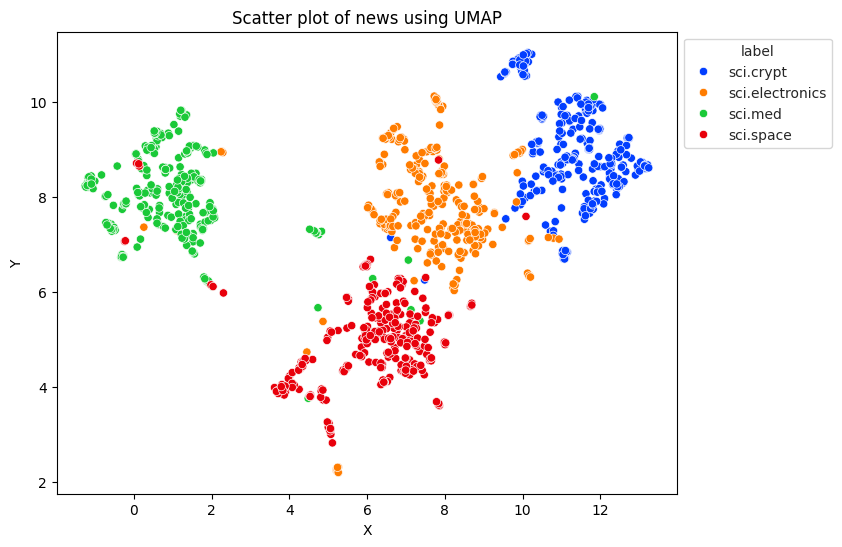

In [21]:
import matplotlib.pyplot as plt

# Plot the centroids against the cluster
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
# sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(data=dim_emb_out, x=dim_emb_out['X'], y=dim_emb_out['Y'], hue='label', palette='bright')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news using UMAP')
plt.xlabel('X')
plt.ylabel('Y')

# Identifying and visualizing the centroids

To identify anomalies among data points, first establish centroids as the central locations representing each cluster. Then, calculate distances from these centroids to determine which points deviate significantly from the cluster centers, indicating outliers. This method helps distinguish between inliers (typical data points) and outliers (anomalous data points) effectively.

Let’s identify the centroid for each of the clusters.

In [22]:
def get_centroids(dim_emb_out):
  # Get the centroid of each cluster
  centroids = dim_emb_out.groupby('label').mean()
  return centroids

centroids = get_centroids(dim_emb_out)
centroids

,X,Y
label,,
sci.crypt,11.289925,8.943106
sci.electronics,7.541861,7.723325
sci.med,1.006718,7.975066
sci.space,6.053279,4.984555


In [23]:
def get_embedding_centroids(df):
  emb_centroids = dict()
  grouped = df.groupby('Label')
  for c in grouped.groups:
    sub_df = grouped.get_group(c)
    # Get the centroid value of dimension 768
    emb_centroids[c] = np.mean(sub_df['Embeddings'], axis=0)

  return emb_centroids

In [24]:
emb_c = get_embedding_centroids(df)

Text(0, 0.5, 'Y')

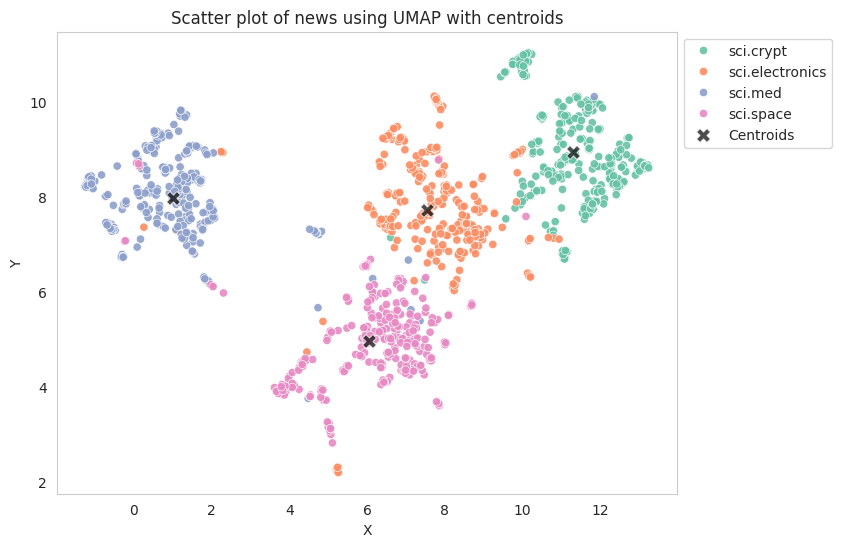

In [25]:
# Plot the centroids against the cluster
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=dim_emb_out, x=dim_emb_out['X'], y=dim_emb_out['Y'], hue='label', palette='Set2', alpha = 0.9);
sns.scatterplot(data=centroids, x=centroids['X'], y=centroids['Y'], color="black", marker='X', s=100, label='Centroids', alpha = 0.7)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news using UMAP with centroids')
plt.xlabel('X')
plt.ylabel('Y')

# Visualizing the outliers

In [26]:
def calculate_euclidean_distance(p1, p2):
  return np.sqrt(np.sum(np.square(p1 - p2)))

def detect_outlier(df, emb_centroids, radius):
  for idx, row in df.iterrows():
    class_name = row['Label'] # Get class name of row
    # Compare centroid distances
    dist = calculate_euclidean_distance(row['Embeddings'],
                                        emb_centroids[class_name])
    df.at[idx, 'Outlier'] = dist > radius

  return len(df[df['Outlier'] == True])

# Simulation for finding the optimal threshold

Now that we have identified the clusters and their centroids, the next step is to determine the criteria for classifying the outliers based on their distance from the centroids. We can play with various thresholds and then decide on the criteria or we can run a simulation for various values and check the number of outliers for each criterion.

In [27]:
range_ = np.arange(0.8, 1.2, 0.03).round(decimals=2).tolist()
# range_ = np.arange(0.3, 0.75, 0.02).round(decimals=2).tolist()
num_outliers = []
for i in range_:
  num_outliers.append(detect_outlier(df, emb_c, i))

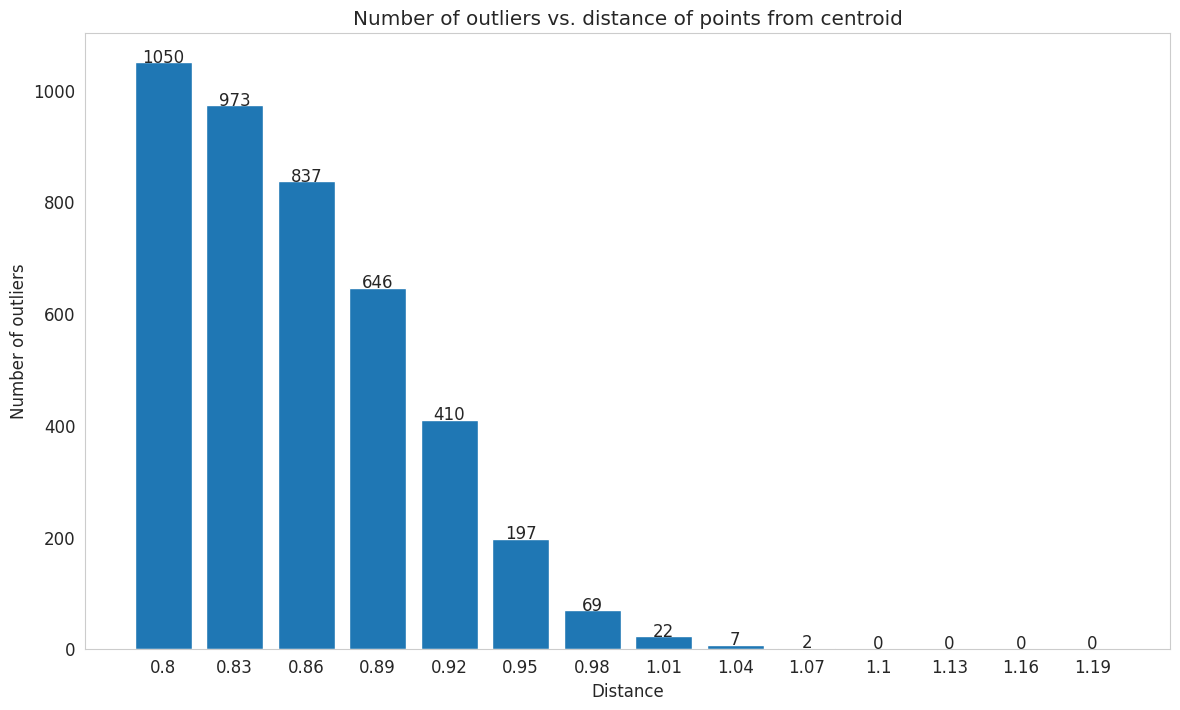

In [28]:
# Plot range_ and num_outliers
fig = plt.figure(figsize = (14, 8))
plt.rcParams.update({'font.size': 12})
plt.bar(list(map(str, range_)), num_outliers)
plt.title("Number of outliers vs. distance of points from centroid")
plt.xlabel("Distance")
plt.ylabel("Number of outliers")
for i in range(len(range_)):
  plt.text(i, num_outliers[i], num_outliers[i], ha = 'center')

plt.show()

In [73]:
# View the points that are outliers
RADIUS = 0.98
detect_outlier(df, emb_c, RADIUS)
df_outliers = df[df['Outlier'] == True]
df_outliers.head()

,index,Text,Label,Class Name,Embeddings,0,1,2,3,4,...,375,376,377,378,379,380,381,382,383,Outlier
27,3327,How large are commercial keys?\nOrganization:...,11,sci.crypt,"[0.024051694, -0.049293004, -0.059241615, -0.0...",0.024052,-0.049293,-0.059242,-0.090892,-0.062602,...,0.047367,-0.046109,0.011739,-0.073256,-0.006637,0.001836,-0.054013,-0.059552,0.013175,True
63,3363,Re: Tempest\nNntp-Posting-Host: lonestar.utsa...,11,sci.crypt,"[-0.05443724, -0.033077873, 0.05802698, -0.041...",-0.054437,-0.033078,0.058027,-0.041553,-0.005936,...,0.029534,-0.037770,-0.077977,0.015418,-0.015972,-0.009521,0.044660,-0.035123,0.091608,True
78,3378,"Bob ""Putz"" Cain \nNntp-Posting-Host: next7.c...",11,sci.crypt,"[-0.012732781, 0.12679374, -0.05202725, 0.0793...",-0.012733,0.126794,-0.052027,0.079353,0.012690,...,0.063671,0.009598,0.022490,-0.116310,-0.133458,-0.008572,0.097709,0.011905,-0.064633,True
97,3397,A little political philosophy worth reading.\...,11,sci.crypt,"[0.04906215, 0.115484715, 0.02724198, -0.05350...",0.049062,0.115485,0.027242,-0.053502,-0.006952,...,-0.017006,0.048514,0.134733,-0.013045,-0.016360,-0.040569,-0.032299,-0.008889,0.042942,True
103,3403,Re: Trinomial-Based PRNG\nOrganization: Schoo...,11,sci.crypt,"[-0.09633481, 0.107192695, -0.047838103, -0.02...",-0.096335,0.107193,-0.047838,-0.020952,-0.038283,...,-0.008650,-0.059282,0.006557,0.041063,-0.041525,-0.051588,0.021959,0.055268,0.098790,True


In [74]:
df_outliers['Outlier'].value_counts()

Outlier
True    69
Name: count, dtype: int64

In [75]:
outliers_projected = dim_emb_out.loc[df_outliers['Outlier'].index]

# Visualizing the outliers for specifc threshold

Text(0, 0.5, 'Y')

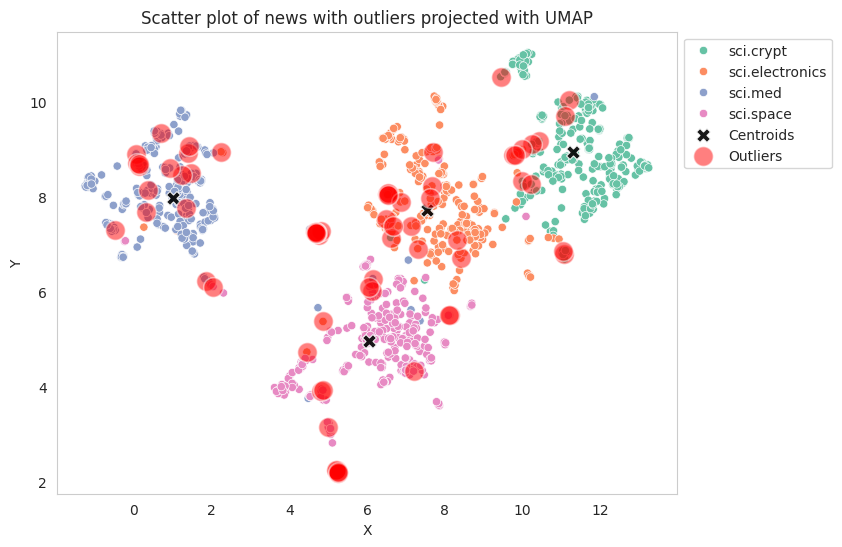

In [76]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
plt.rcParams.update({'font.size': 10})
# sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(data=dim_emb_out, x=dim_emb_out['X'], y=dim_emb_out['Y'], hue='label', palette='Set2');
sns.scatterplot(data=centroids, x=centroids['X'], y=centroids['Y'], color="black", marker='X', s=100, label='Centroids', alpha = 0.9)

# Draw a red circle around the outliers
sns.scatterplot(data=outliers_projected, x=outliers_projected['X'], y=outliers_projected['Y'], color='red', marker='o', alpha=0.5, s=200, label='Outliers')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news with outliers projected with UMAP')
plt.xlabel('X')
plt.ylabel('Y')



# **Conclusion**
We explore how embeddings capture the essence of complex data and how visualizing these embeddings can uncover hidden patterns, trends, and outliers. We discussed the importance of setting centroids to understand clusters and identifying outliers to refine model performance. Additionally, we touched on powerful tools like UMAP for dimensionality reduction, making high-dimensional data more interpretable.